In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [4]:
train = pd.read_csv(r'C:\Users\kalya\Desktop\Statistics\titanic ML\Data\EDA data.csv')

In [5]:
del train['Unnamed: 0']

In [6]:
train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
209,1,Class 1,"Blank, Mr. Henry",male,40.0,0,0,31.0000,A,C,0
116,0,Class 3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,n,Q,0
1,1,Class 1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
188,0,Class 3,"Bourke, Mr. John",male,40.0,1,1,15.5000,n,Q,2
764,0,Class 3,"Eklund, Mr. Hans Linus",male,16.0,0,0,7.7750,n,S,0


In [7]:
pd.crosstab(train.Survived, columns = 'count')
pd.crosstab(train.Pclass, columns = 'count')
pd.crosstab(train.Cabin, columns = 'count')

col_0,count
Survived,
0,549
1,342


col_0,count
Pclass,
Class 1,216
Class 2,184
Class 3,491


col_0,count
Cabin,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
n,687


In [8]:
train.Sex.value_counts()
s = pd.crosstab(train.Sex, columns = 'count')

male      577
female    314
Name: Sex, dtype: int64

In [9]:
s/s.sum()

col_0,count
Sex,
female,0.352413
male,0.647587


In [10]:
survived_sex = pd.crosstab(index=train["Survived"], 
                           columns=train["Sex"],margins = True)

In [11]:
survived_sex.index = ['Died','Survived','Total']

In [12]:
survived_sex/survived_sex.iloc[2,2]

Sex,female,male,All
Died,0.090909,0.525253,0.616162
Survived,0.261504,0.122334,0.383838
Total,0.352413,0.647587,1.000000


In [13]:
_3d = pd.crosstab(index = train.Survived, columns = [train.Pclass,train.Sex], margins = True)
_3d.index = ['Died','Survived','Total']

In [14]:
_3d

Pclass   Class 1      Class 2      Class 3       All
Sex       female male  female male  female male     
Died           3   77       6   91      72  300  549
Survived      91   45      70   17      72   47  342
Total         94  122      76  108     144  347  891

In [15]:
_3d['Class 2']['female']['Died']

6

In [16]:
_3d.T  #transpose

Died  Survived  Total
Pclass  Sex                          
Class 1 female     3        91     94
        male      77        45    122
Class 2 female     6        70     76
        male      91        17    108
Class 3 female    72        72    144
        male     300        47    347
All              549       342    891

# Descriptive stats


## Central tendencies

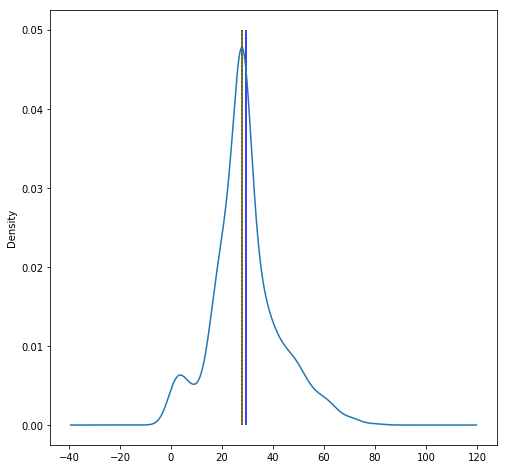

In [83]:
train.Age.plot(kind = 'density', figsize = (8,8))

plt.vlines(train.Age.mode(), ymin = 0, ymax = 0.05, color = 'green')
plt.vlines(train.Age.median(), ymin = 0, ymax = 0.05, color = 'red', linestyles = 'dotted')
plt.vlines(train.Age.mean(), ymin = 0, ymax = 0.05, color = 'blue')

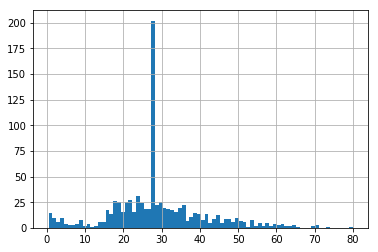

In [89]:
train.Age.hist(bins = 80)

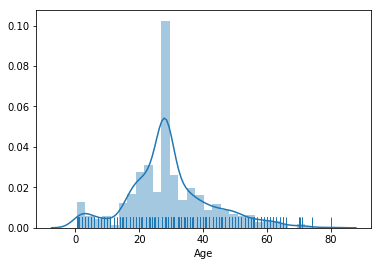

In [96]:
import seaborn as sns
sns.distplot(train.Age, bins =30, hist = True, kde = True, rug = True)

# rug shows every value in distribution

# total area under the curve integrates to 1

## Spread

In [97]:
train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

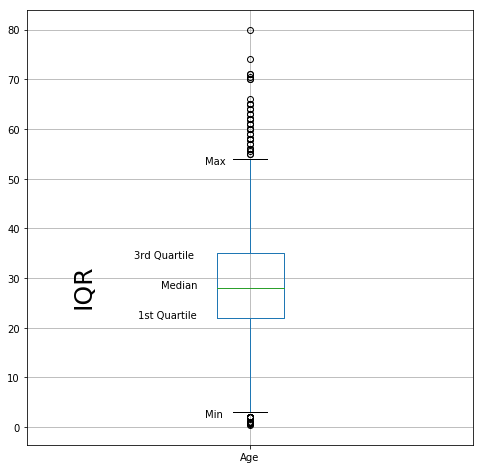

In [41]:
train.boxplot(column = 'Age', return_type = 'dict', figsize = (8,8))

plt.text(x=0.74, y=34, s="3rd Quartile")
plt.text(x=0.8, y=28, s="Median")
plt.text(x=0.75, y=22, s="1st Quartile")
plt.text(x=0.9, y=2, s="Min")
plt.text(x=0.9, y=53, s="Max")
plt.text(x=0.6, y=29, s="IQR", rotation=90, size=25);

In [81]:
max(train.Age) - min(train.Age)   #range

train.Age.quantile(1) - train.Age.quantile(0)

79.58

79.58

In [82]:
v = sum( (train.Age - train.Age.mean()) * (train.Age - train.Age.mean()) ) / train.Age.count()
v

var =train.Age.var()
var

import math
math.sqrt(v) # std dev

stddev = train.Age.std()
stddev

169.51249827942345

13.01238827279366

13.019696550973201

In [80]:
MAD = abs(train.Age - train.Age.median()).median() * 1.4826      #median absolute deviation not susceptible to skewness/outliers
MAD
# Note: The MAD is often multiplied by a scaling factor of 1.4826.

8.8956

## Kustosis and Skewness

In [98]:
train.skew()

Survived    0.478523
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Family      2.727441
dtype: float64

In [99]:
train.kurt()

Survived    -1.775005
Age          0.993871
SibSp       17.880420
Parch        9.778125
Fare        33.398141
Family       9.159666
dtype: float64